# K-Means Clustering

## About Task:
### From the give 'Iris' dataset, predict the optimum number of clusters and represent it visually

## Author:
### Mohammed Faheem G

## Phase 1 : Creation and Visualization of Iris Dataset 
### Importing Required Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Reading Iris Dataset from Sci-Kit Learn Library

In [3]:
iris = load_iris()

In [4]:
df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Getting a summarized report of iris dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### Visualizing the points in scatter plots to get a better understanding

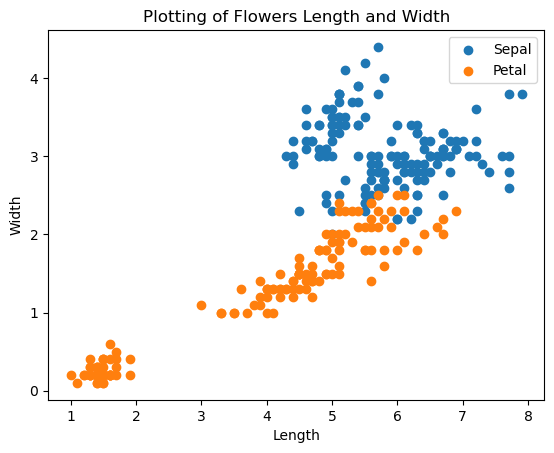

In [6]:
%matplotlib inline
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'],label = 'Sepal')
plt.scatter(df['petal length (cm)'],df['petal width (cm)'],label = 'Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.title('Plotting of Flowers Length and Width')
plt.legend()
plt.show()

## Phase  2 : Discovery of optimal centroid counts 
### Performing SSE to get the perfect centroid

In [7]:
sse = []
k_range = range(1,len(df))
for i in k_range:
    km = KMeans(n_clusters = i)
    km.fit(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

### By plotting SSE, We can get the optimal centroids count
#### In this case, 3 is the Elbow point, so it's the optimal centroids count

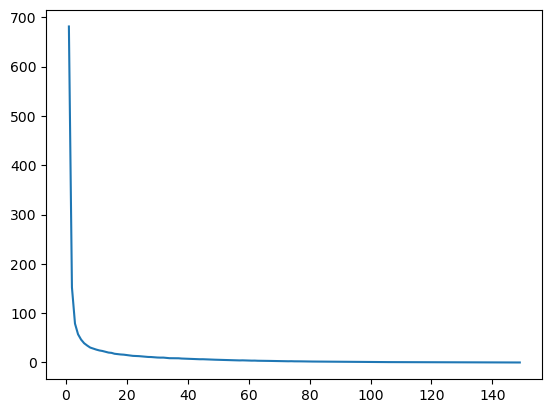

In [8]:
%matplotlib inline
plt.plot(k_range,sse)

## Phase 3 : Creation of clusters and plotting the final output
### Creating a model of K-Means with 3 clusters

In [9]:
Km = KMeans(n_clusters=3)
Km.fit(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])

KMeans(n_clusters=3)

### Predicting (Assigning) the cluster points to each row 

In [10]:
clusters = Km.predict(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### Storing the assigned cluster values in a new column of the dataset named 'clusters'

In [11]:
df['clusters'] = clusters
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Converting the datasets into the arrray

In [12]:
pd1 = df.iloc[:,:].values

### Getting the centroid Values

In [13]:
centroids=Km.cluster_centers_
centroids

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [15]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Plotting the 'K-Means clustering final output'

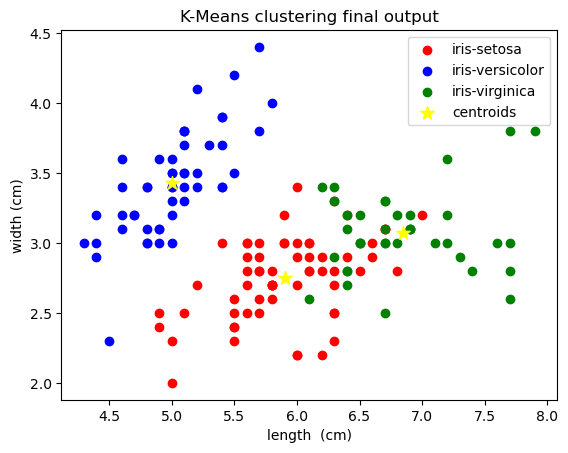

In [14]:
%matplotlib inline
plt.scatter(pd1[clusters==0,0],pd1[clusters==0,1],color='red',label='iris-setosa')
plt.scatter(pd1[clusters==1,0],pd1[clusters==1,1],color='blue',label='iris-versicolor')
plt.scatter(pd1[clusters==2,0],pd1[clusters==2,1],color='green',label='iris-virginica')
plt.scatter(centroids[:,0],centroids[:,1],color='yellow',marker='*',label='centroids',s=100)
plt.xlabel('length  (cm)')
plt.ylabel('width (cm)')
plt.title('K-Means clustering final output')
plt.legend()

# <center>THANK YOU</center>